In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
import random

In [24]:
df = pd.read_csv("covid_analytics_clinical_data.csv")

for col in df.columns:
    arr = df[col].to_numpy()
    if isinstance(arr[df[col].first_valid_index()],str):
        if re.search('.*%$', arr[df[col].first_valid_index()]):
            df[col] = (df[col].str.strip('%').astype(float))
        else:
            df[col] = df[col].str.lower()
            arr = df[col].to_numpy()
            arr = pd.unique(arr)
            classifier = np.array([i for i in range(len(arr))])
            df[col]=df[col].replace(arr,classifier)

df = df.fillna(-1)
df

,ID,SUB_ID,Country,Province/State,Study Pop Size (N),Proportion of values entered in row (%),Paper Title,Journal,Author,Source,...,Hypoproteinaemia,Acidosis,Hospital admission (%),ICU admission,Discharged (%),"ICU length of stay, days","Hospital length of stay, days",Days to Viral Clearance (Median),Mortality,Projected Mortality (accounting for patients not currently discharged)
0,1.0,0.0,0,0,191.0,60.11,0,0,0,0,...,11.52,8.90,1.0,0.26,0,0,0,20.0,0,0
1,1.0,1.0,0,0,54.0,60.11,0,0,0,0,...,37.04,29.63,1.0,0.72,1,0,1,7.5,1,1
2,1.0,2.0,0,0,137.0,60.11,0,0,0,0,...,1.46,0.73,1.0,0.08,2,1,2,20.0,2,2
3,2.0,0.0,0,0,199.0,44.94,1,1,1,1,...,-1.00,-1.00,1.0,-1.00,0,2,3,28.0,3,3
4,2.0,1.0,0,0,99.0,44.94,1,1,1,1,...,-1.00,-1.00,1.0,-1.00,3,3,4,28.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,202.0,2.0,2,56,99.0,23.60,175,40,88,202,...,-1.00,-1.00,1.0,0.32,71,0,28,-1.0,30,42
535,202.0,3.0,2,56,117.0,23.03,175,40,88,202,...,-1.00,-1.00,1.0,0.54,53,13,13,-1.0,24,57
536,202.0,4.0,2,56,247.0,25.84,175,40,88,202,...,-1.00,-1.00,1.0,0.39,47,0,28,-1.0,3,4
537,202.0,5.0,2,56,50.0,25.28,175,40,88,202,...,-1.00,-1.00,1.0,0.42,22,13,28,-1.0,38,25


In [25]:
sampled = df.sample(100)

[9.61806352e-03 9.04473167e-03 3.02523558e-03 1.01582848e-02
 9.39583023e-03 1.55717374e-02 1.17903284e-02 6.13767083e-03
 1.07326216e-02 9.91387991e-03 5.05105810e-03 4.84556394e-04
 6.83455317e-03 1.99572086e-03 8.22648755e-03 7.22292486e-03
 1.07405477e-02 6.12616148e-03 1.03873382e-02 3.95044910e-04
 1.88113071e-02 1.36755846e-02 9.14888729e-03 4.74229123e-03
 6.84424392e-03 8.34977067e-03 1.46493123e-02 1.48729255e-02
 1.32859387e-02 6.14586300e-03 1.14331247e-02 1.05144668e-02
 4.64613061e-03 6.40455495e-03 3.51946584e-03 3.18130195e-03
 8.83828881e-03 3.30138186e-03 5.13750624e-03 5.28194855e-03
 4.94177695e-03 7.95585518e-03 1.21321503e-03 6.26524877e-04
 1.46274595e-03 1.42335523e-03 5.18817686e-03 3.40626965e-03
 2.03762093e-03 3.40645792e-03 5.34539068e-03 2.45280079e-03
 5.20506419e-03 4.52087153e-03 1.38220627e-02 8.51187611e-03
 1.78235682e-02 1.17944142e-02 7.59045788e-03 8.57855337e-03
 8.86579191e-03 1.01547061e-02 1.21177737e-02 9.19281538e-03
 7.22365312e-03 3.795079

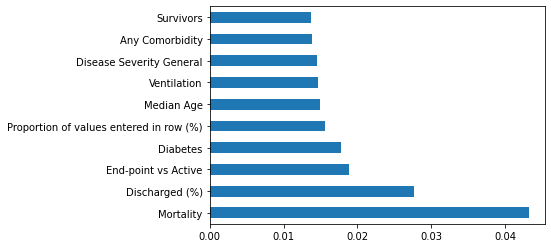

In [26]:

x = sampled.iloc[:, 0:161]
y = sampled.iloc[:, -1]
y = y.astype('int')

model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

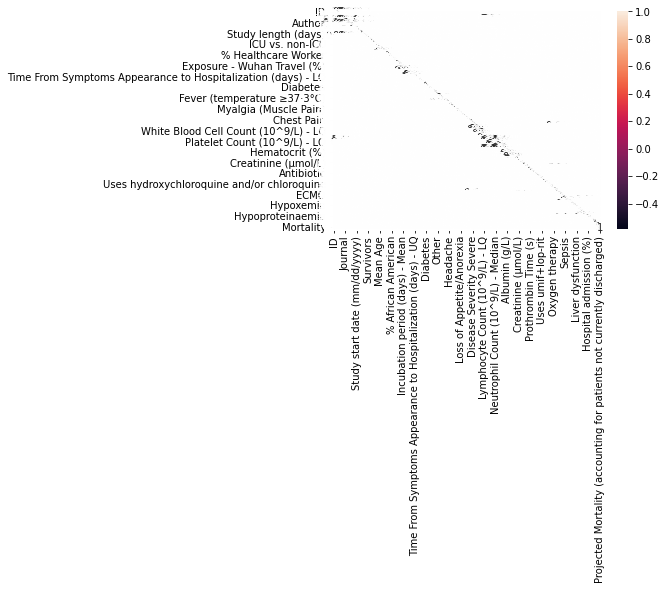

In [27]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [28]:
new_df = np.array(sampled[['Mortality','Discharged (%)','Survivors', 'End-point vs Active', 'Any Comorbidity']])

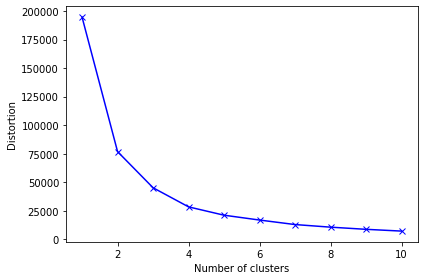

In [29]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(new_df)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

In [30]:
km = KMeans(3)

km.fit(new_df)


KMeans(n_clusters=3)

In [31]:
x = np.nan_to_num(new_df)

In [32]:
#uses the pca algorithm to be able to easily plot the kmeans


pca = PCA(n_components=2)

pca_components = pca.fit_transform(x)

labels = km.labels_

In [33]:
#
pca_df = pd.DataFrame(data = pca_components, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-20.678462,-21.606741
1,-32.401308,54.025241
2,-22.066454,-17.350075
3,-19.106787,24.226136
4,78.400763,-8.169373


In [34]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-20.678462,-21.606741,1
1,-32.401308,54.025241,0
2,-22.066454,-17.350075,1
3,-19.106787,24.226136,0
4,78.400763,-8.169373,2


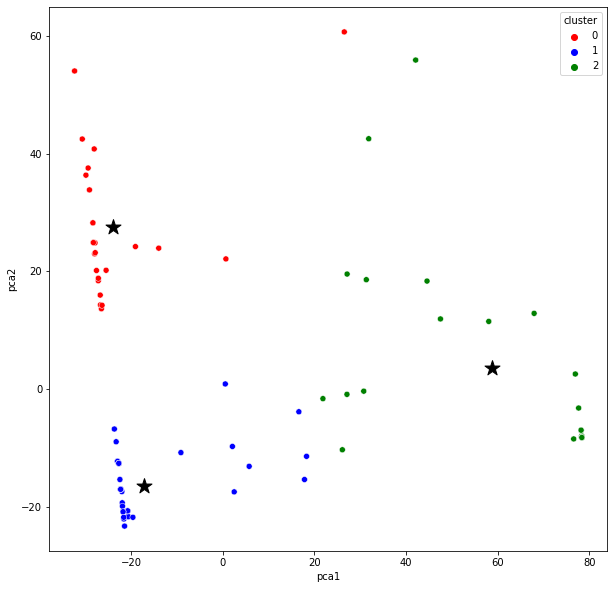

In [35]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'blue', 'green'])

centers_on_PCs = pca.transform(km.cluster_centers_)
plt.scatter(centers_on_PCs[:, 0], centers_on_PCs[:,1], s= 250, c = "k", marker="*")

In [36]:
#Set up data for train
x = new_df
y = np.array(sampled['Projected Mortality (accounting for patients not currently discharged)'])
y = y.astype('int')


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(new_df, y,train_size = 0.2)
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
predicted = clf.predict(X_test)

In [38]:
data = {'y_Actual': Y_test, 'y_Predicted': predicted}

data = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
data

,y_Actual,y_Predicted
0,2,2
1,2,56
2,30,43
3,2,2
4,2,2
...,...,...
75,7,7
76,1,1
77,7,7
78,7,2


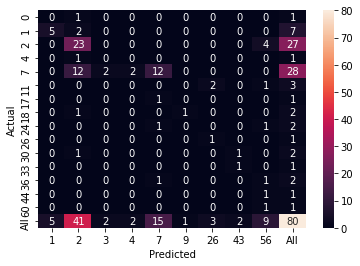

In [39]:
confusion_matrix = pd.crosstab(data['y_Actual'], data['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins= True)

sns.heatmap(confusion_matrix, annot=True)
plt.show()
